In [1]:
# 셀레니움 사용을 고려하는 상황
# 비동기 통신에 의한 페이지 로딩이 힘든 경우
    # html에서 데이터를 가지고 와야 하는데 안나오는 경우
    # fetch/xhr 에서 api가 안나오는 경우
# 특정 페이지 캡쳐, 다운해서 수집 등 사용자의 액션이 필요한 경우

In [2]:
YOUTUBE_ENDGAME_VIDEO_URL = "https://www.youtube.com/watch?v=Ko2NWhXI9e8&t=10s"

In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

def get_chrome_driver():
    # 1. 브라우저 옵션 세팅
    chrome_options = webdriver.ChromeOptions()
    
    # 2. driver 생성
    driver = webdriver.Chrome(
        service = Service(ChromeDriverManager().install()),
        options = chrome_options
    
    )
    return driver

In [4]:
driver = get_chrome_driver()

In [5]:
driver.get(YOUTUBE_ENDGAME_VIDEO_URL)

In [6]:
# 스크린샷 저장
driver.save_screenshot("endgame_10s_screenshot.png")
driver.quit()

In [7]:
from selenium.webdriver.common.by import By

driver = get_chrome_driver()
driver.get(YOUTUBE_ENDGAME_VIDEO_URL)

movie_player = driver.find_element(
    By.CSS_SELECTOR,
    "#movie_player"
)
movie_player

<selenium.webdriver.remote.webelement.WebElement (session="9059f163b3db1d9e289da609b97a4d5c", element="52b7f720-e85d-41ea-9f04-6efb3df8582f")>

In [8]:
# 영상 가운데 큰 재생버튼 눌러주기
try:
    driver.find_element(
        By.CSS_SELECTOR,
        ".ytp-large-play-button.ytp-button"
    ).click()
except:
    pass

In [9]:
# element의 위치 찾기 (좌상단 좌표 : left-top location)
location = movie_player.location
location

{'x': 24, 'y': 80}

In [10]:
# element의 크기 구하기
size = movie_player.size
size

{'height': 360, 'width': 640}

In [11]:
left = location['x']
top = location['y']
right = left + size['width']
bottom = top + size['height']

area = (left, top, right, bottom)
area

(24, 80, 664, 440)

In [12]:
# PIL 라이브러리 사용
# Python Image Libray

In [13]:
from PIL import Image as pil

In [14]:
# 스크린샷 찍기
driver.save_screenshot("./ironman_mask.png")
driver.quit()

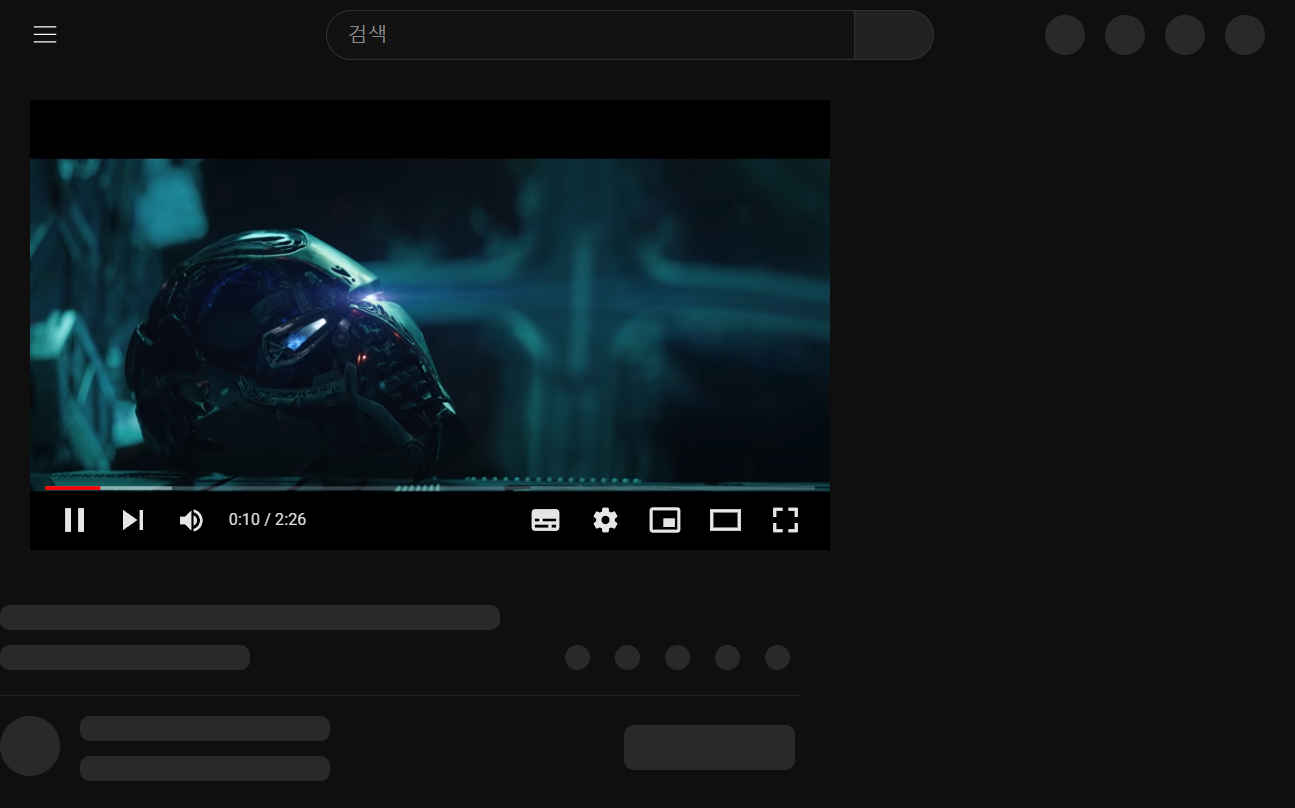

In [15]:
pil_img = pil.open("./ironman_mask.png")
pil_img

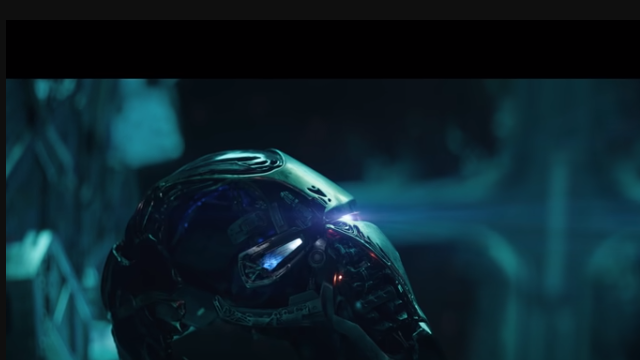

In [16]:
crop_img = pil_img.crop(area)
crop_img

In [17]:
crop_img.save("crop_ironman_mask.png")

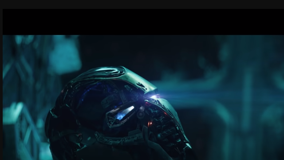

In [18]:
crop_img.thumbnail((320,160))
crop_img

In [25]:
# 유튜브 영상 다운로드
# youtube 앞에 ssyoutube 하면 다운 받는 사이트 가짐
def download(title, link):
    response = requests.get(link, stream=True)
    save_path, size = "{}".format(title), 0
    with open(save_path, "wb") as f:
        for chunk in response.iter_content(chunk_size=1024):
            if chunk:
                size += 1024
                f.write(chunk)
    return size

In [19]:
YOUTUBE_MOVIE_DOWNLOAD_URL="https://www.ssyoutube.com/watch?v=Ko2NWhXI9e8"

driver = get_chrome_driver()
driver.get(YOUTUBE_MOVIE_DOWNLOAD_URL)

In [21]:
download_button = driver.find_element(
    By.CSS_SELECTOR,
    "#sf_result > div > div > div.info-box > div.link-box > div.def-btn-box > a"
)
download_button

<selenium.webdriver.remote.webelement.WebElement (session="0e61070cf80233bc5c2943a6e6ee2bd8", element="3b270ae8-1e34-4f52-8131-380c606a2ab9")>

In [22]:
# 셀레니움을 통한 attribute 수집
title =download_button.get_attribute("download")
download_souce = download_button.get_attribute("href")

title, download_souce


('[어벤져스- 엔드게임] 메인 예고편│마블 공식 예고편.mp4',
 'https://rr2---sn-p5qlsndd.googlevideo.com/videoplayback?expire=1680170740&ei=lAolZNgolZTzBPC7oXg&ip=207.204.229.13&id=o-AOVkSW7a-1hi40E8szfk3Vlve_Rm0PgWa15fkgYwbZEe&itag=22&source=youtube&requiressl=yes&mh=3T&mm=31%2C29&mn=sn-p5qlsndd%2Csn-p5qddn76&ms=au%2Crdu&mv=m&mvi=2&pl=24&pcm2=yes&initcwndbps=588750&spc=99c5CQMImNsMwKM00DrzdzE_y59NhYGjd0KhdAqEgyqDVKCAnw&vprv=1&mime=video%2Fmp4&ns=TRvkSEMSCmxmkTAEwU5Nr24M&cnr=14&ratebypass=yes&dur=146.192&lmt=1554392313399270&mt=1680148631&fvip=1&fexp=24007246&c=WEB&txp=5535432&n=dZtslgQBvW6asg&sparams=expire%2Cei%2Cip%2Cid%2Citag%2Csource%2Crequiressl%2Cpcm2%2Cspc%2Cvprv%2Cmime%2Cns%2Ccnr%2Cratebypass%2Cdur%2Clmt&sig=AOq0QJ8wRgIhAKHpLZ01yIbEZIoLV1_cp-_t1q8qAJnSXH4w8gxYG7fbAiEAnCqB82osPI6xp81bfclytr07SxHBhw0iJ62T8zir_gs%3D&lsparams=mh%2Cmm%2Cmn%2Cms%2Cmv%2Cmvi%2Cpl%2Cinitcwndbps&lsig=AG3C_xAwRQIhALIctHNG8Qj0DiLF791sCMWIVtufHwXXUrKTcxxtJMSaAiB8pZJbgToW_xT0GSUO6RcXDzY_DGOOmhwxJG6RJ-FV6A%3D%3D&title=%5B%EC%96%B4

In [26]:
import requests

size = download(title, download_souce)
size

10750976

In [27]:
driver.quit()